In [20]:
import scipy
scipy.__version__
from scipy import *
import numpy as np

In [4]:
dir(scipy)

['LowLevelCallable',
 '__numpy_version__',
 '__version__',
 'cluster',
 'datasets',
 'fft',
 'fftpack',
 'integrate',
 'interpolate',
 'io',
 'linalg',
 'misc',
 'ndimage',
 'odr',
 'optimize',
 'show_config',
 'signal',
 'sparse',
 'spatial',
 'special',
 'stats',
 'test']

In [8]:
from scipy.constants import *

In [9]:
pi

3.141592653589793

In [10]:
h # 普朗克常数

6.62607015e-34

In [30]:
from scipy.fftpack import fft, ifft

In [31]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print(f'{x}\n\n{y}')

# j^2 = -1
# j是虚数

[ 1.   2.   1.  -1.   1.5]

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


In [33]:
y = ifft(x) # 傅立叶变换
print(f'{x}\n\n{y}')

[ 1.   2.   1.  -1.   1.5]

[ 0.9      -0.j          0.4163119+0.33021975j -0.3663119-0.32164408j
 -0.3663119+0.32164408j  0.4163119-0.33021975j]


In [35]:
# Inverse discrete cosine transform
from scipy.fftpack import dct, idct 
y = dct(np.array([4., 3., 5., 10., 5., 3.]))
y

array([ 60.        ,  -3.48476592, -13.85640646,  11.3137085 ,
         6.        ,  -6.31319305])

插值

In [36]:
from scipy import interpolate as intp
import matplotlib.pyplot as plt

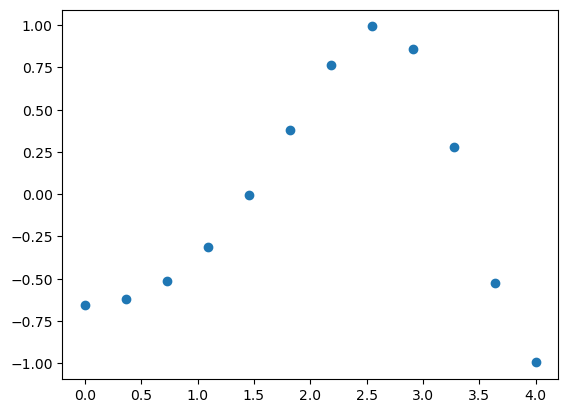

In [37]:
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3 + 4)
plt.plot(x, y, "o")
plt.show()

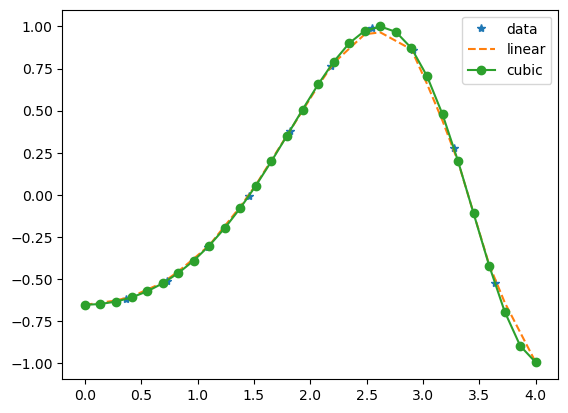

In [49]:
f1 = intp.interp1d(x, y, kind = 'linear')
f2 = intp.interp1d(x, y , kind = 'cubic')
xnew = np.linspace(0, 4, 30)
plt.plot(x, y, "*", xnew, f1(xnew), '--', xnew, f2(xnew), '-o')
# plt.show()
plt.legend(['data', 'linear', 'cubic', 'nearest'], loc = 'best')
plt.show()
plt.legend?

In [50]:
from scipy.interpolate import UnivariateSpline

In [53]:
x = np.linspace(-3,3,50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
print(f'{x}\n\n{y}')

[-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.3877551
 -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.7755102  -1.65306122
 -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
 -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
 -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
  1.40816327  1.53061224  1.65306122  1.7755102   1.89795918  2.02040816
  2.14285714  2.26530612  2.3877551   2.51020408  2.63265306  2.75510204
  2.87755102  3.        ]

[ 0.04112023 -0.0363929   0.04030346  0.14582672  0.16853468  0.15860297
  0.08653404 -0.00924701  0.15883436  0.05700274  0.09641324 -0.06136508
  0.10085268  0.15471745  0.09365965  0.35354287  0.50918077  0.544184
  0.60591772  0.71250346  0.74429275  0.58357253  0.852479    0.88969724
  0.88281212  0.94575694  0.98097417  0.87638861  0.85400766  0.75811434
  0.54686297  0.4514296   0

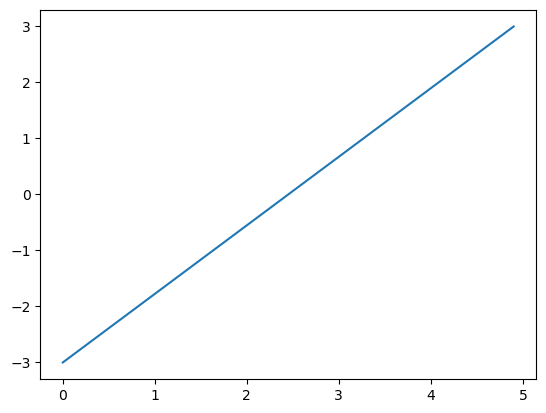

In [54]:
plt.plot(np.arange(0,5,0.1), x)
plt.show()

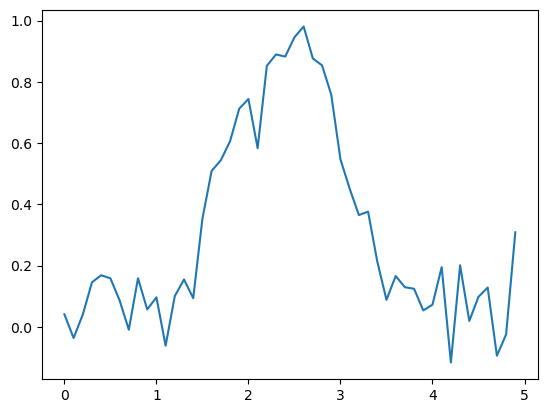

In [55]:
plt.plot(np.arange(0,5,0.1), y)
plt.show()

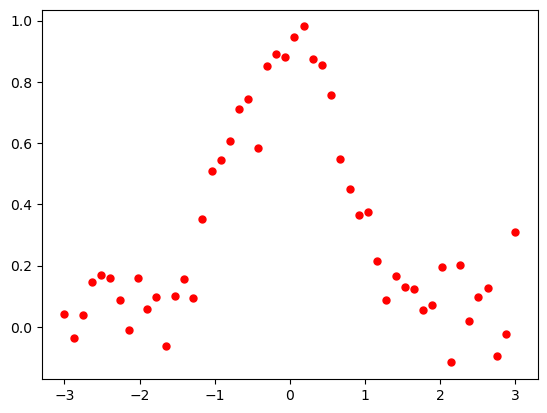

In [57]:
plt.plot(x,y, 'ro', ms=5)
plt.show()

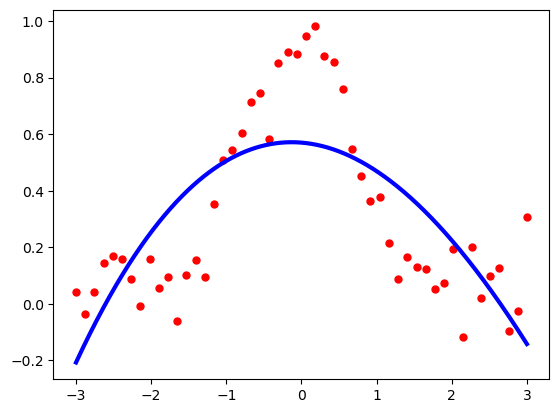

In [62]:
plt.plot(x,y, 'ro', ms=5)
spl = UnivariateSpline(x,y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'b', lw=3)

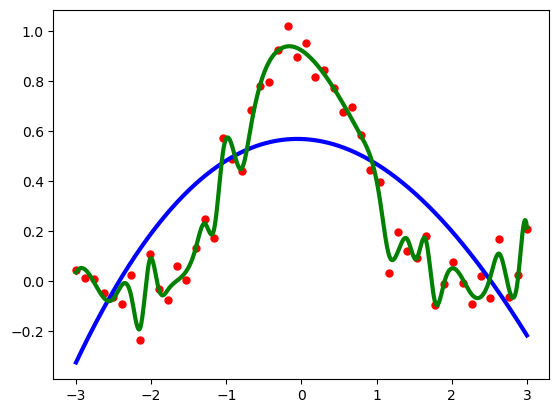

In [69]:
plt.plot(x,y, 'ro', ms=5)
spl = UnivariateSpline(x,y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'b', lw=3)
spl.set_smoothing_factor(0.1) # smooth因子0.1
plt.plot(xs, spl(xs), 'g', lw=3)

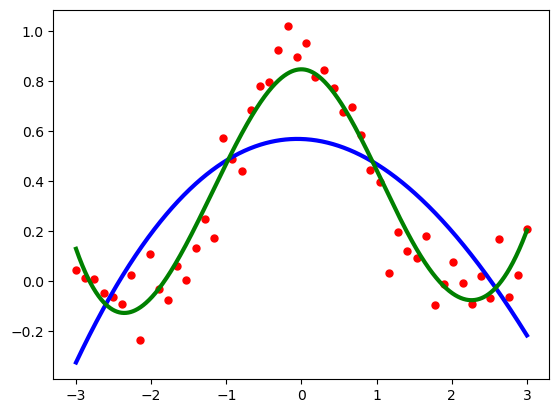

In [68]:
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50) # 添加噪声
plt.plot(x, y, 'ro', ms=5)
# 平滑参数使用默认值
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'b', lw=3) # 蓝色曲线
# 设置平滑参数
spl.set_smoothing_factor(0.5)  # smooth因子0.5
plt.plot(xs, spl(xs), 'g', lw=3) # 绿色曲线

In [71]:
# scipy.linalg 线性方程

In [72]:
from scipy import linalg
a = np.array([
    [1,3,5],
    [2,5,1],
    [2,3,8]
])
b = np.array([10,8,3])
x = linalg.solve(a,b)
x

array([-9.28,  5.16,  0.76])

In [75]:
# 行列式计算
A = np.array([ 
    [3,4],
    [7,8]
])
x = linalg.det(A)
x

-4.0

In [84]:
# scipy.eig
A = np.array([
    [3,4],
    [7,8]
])
l, v = linalg.eig(A)
print(
f"""
特征值:
{l}
特征向量:
{v}""")


特征值:
[-0.35234996+0.j 11.35234996+0.j]
特征向量:
[[-0.76642628 -0.43192981]
 [ 0.64233228 -0.90190722]]


In [85]:
# 奇异值分解SVD
a = np.random.randn(3,2) + 1.j*np.random.randn(3,2)
print(f"原矩阵\n{a}")

原矩阵
[[-0.33579149-1.2188239j  -1.17906051-0.86476712j]
 [ 1.05484499+1.20175371j  1.66928837-0.90990717j]
 [-1.68223125-0.42736645j  1.69008243-0.9220507j ]]


In [89]:
U, s, Vh = linalg.svd(a)
print(f"""
奇异值分解

{U} #U

{Vh} #Vh

{s} #s
""")


奇异值分解

[[-0.23483155+0.45474854j  0.32780364+0.23102423j -0.74902161-0.12726789j]
 [-0.32027743-0.66686252j -0.25370264-0.06752549j -0.49875204+0.36747577j]
 [ 0.09006459-0.42739095j  0.71319348+0.51147133j  0.16331472+0.11093145j]] #U

[[-0.48855461+0.j          0.15490179+0.85867329j]
 [-0.87253332+0.j         -0.08673363-0.48079402j]] #Vh

[3.24121067 2.47412848] #s

